In [22]:
import requests
import plotly.express as px
import matplotlib.pyplot as plt 
import numpy as np 
import cv2

resp.status_code=200
Original Shape :  img.shape=(2403, 1927, 3)
img.shape=(192, 192, 3)


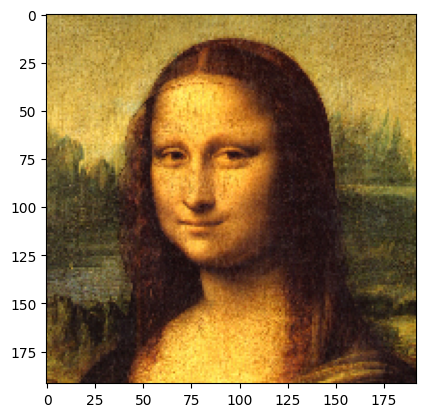

In [37]:
from re import I
url = "https://upload.wikimedia.org/wikipedia/commons/5/55/Mona_Lisa_headcrop.jpg"
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
resp = requests.get(url, headers=headers)
print(f"{resp.status_code=}")

img = np.asarray(bytearray(resp.content), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
print(f"Original Shape :  {img.shape=}")
x,y,_ = img.shape
img = cv2.resize(img, (int(y*0.1), int(x*0.1)))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x,y,_ = img.shape
m = min(x,y)
img = img[:m, :m, :]
print(f"{img.shape=}")
plt.imshow(img)

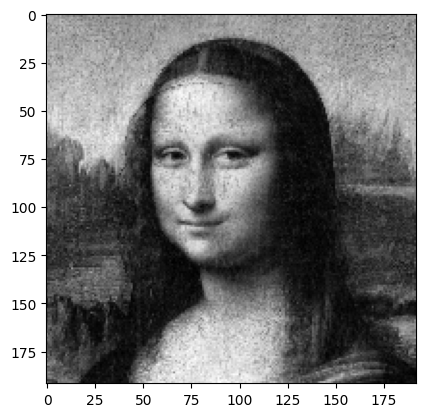

In [38]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

In [39]:
int(min(list(gray.shape)))

192

In [40]:
# make this a grid 

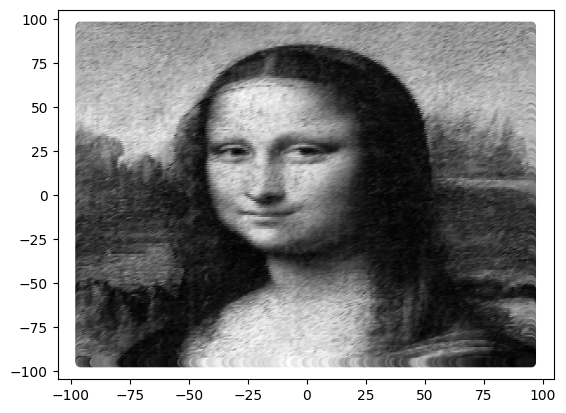

In [43]:
points_x = []
points_y = []
pixels = []
m = int(min(list(gray.shape)))
mid = m // 2
for i in range(m):
    for j in range(m):
        points_x.append(j-m + mid)
        points_y.append(m-i - mid)
        pixels.append(gray[i][j])


plt.scatter(points_x, points_y, c=pixels, cmap="gray")


In [44]:
points = np.vstack([points_x, points_y])
points.shape

(2, 36864)

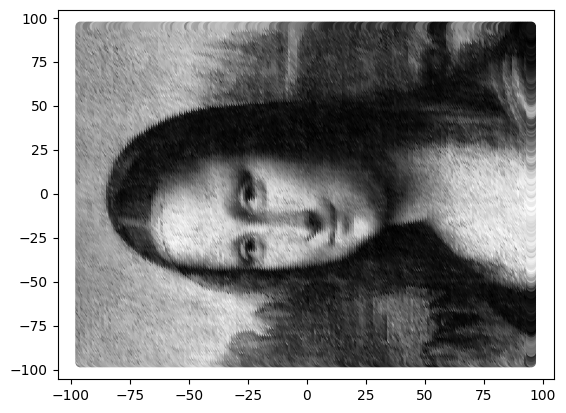

In [45]:
#rotate -- 90 degrees counter clock wise
rotation_matrix = np.array([ [0,-1],[1,0] ])
new_vecs = rotation_matrix@points
plt.scatter(new_vecs[0], new_vecs[1], c=pixels, cmap="gray")

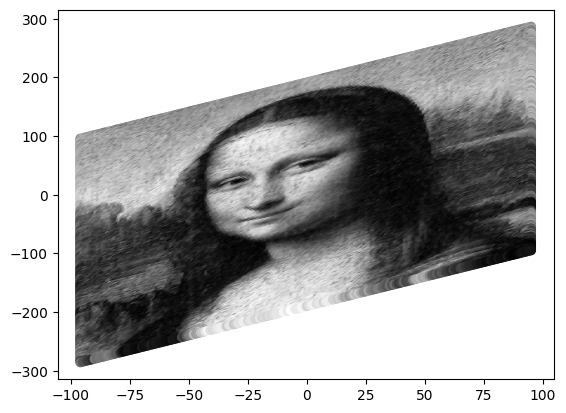

In [48]:
# skew and rotate 
skew_matrix = np.array([ [1,0],[1,2] ])
new_vecs = skew_matrix@points
plt.scatter(new_vecs[0], new_vecs[1], c=pixels, cmap="gray")